# Future Loan Prediction


As per the problem statement, the steps that should be followed by the students are as follows :

- Loading Data
- Exploratory Data Analysis (EDA)
  - Data Mining
  - Plots to study trends
  - Variable transformation
- Feature engineering
- Model Building and Validation

The codes for each of these steps are as follows:

In [6]:
#Loading All Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn import preprocessing

# Loading Data 

In [7]:
cr = pd.read_csv("C:/Users/Aditya/Downloads/CreditRisk.csv")


In [8]:
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [9]:
cr.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981,957,978,956.000000,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,981
unique,981,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002288,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,775,631,NaN,763,807,NaN,NaN,NaN,NaN,NaN,349,712
mean,NaN,NaN,NaN,0.881799,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,1.255623,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,2.000000,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [10]:
cr.shape

(981, 13)

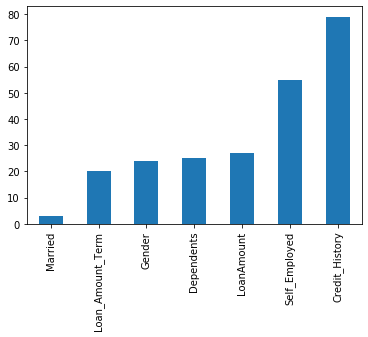

In [11]:
##  Missing Data Analysis 
# Visualize null count in overall dataframe
null_in_data = cr.isnull().sum()

null_in_data = null_in_data[null_in_data > 0]

null_in_data.sort_values(inplace=True)

null_in_data.plot.bar()

plt.show()


# Data Mining

In [12]:
cr.Credit_History = cr.Credit_History.fillna(0)

In [13]:
cr.Self_Employed = cr.Self_Employed.fillna("Yes")

In [14]:
cr.LoanAmount= cr.LoanAmount.fillna(cr.LoanAmount.mean())

In [15]:
cr.Dependents = cr.Dependents.fillna(0)

In [16]:
cr.Gender = cr.Gender.fillna("Male")

In [17]:
cr.Loan_Amount_Term  = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.median())

In [18]:
cr.Married = cr.Married.fillna('No')

In [19]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Plots to study trends

# Categorical variables

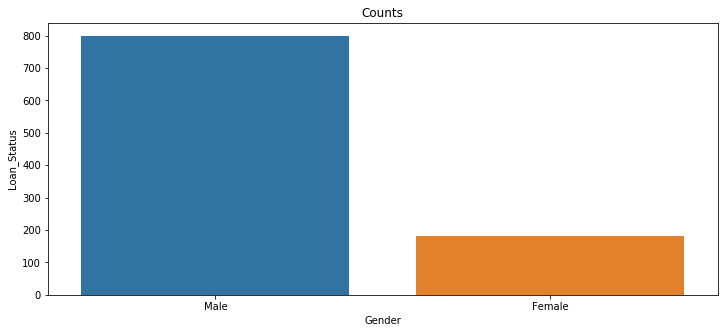

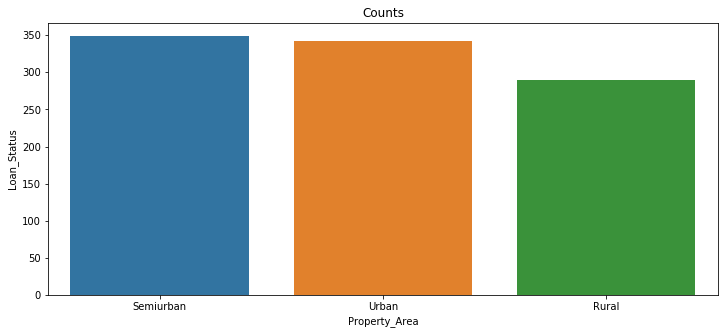

In [20]:
Gender=cr['Gender'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Counts')
plt.ylabel('Loan_Status')
plt.xlabel('Gender')
sns.barplot(x=Gender.index, y=Gender.values)

Property_Area=cr['Property_Area'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Counts')
plt.ylabel('Loan_Status')
plt.xlabel('Property_Area')
sns.barplot(x=Property_Area.index, y=Property_Area.values)

# Numerical variables

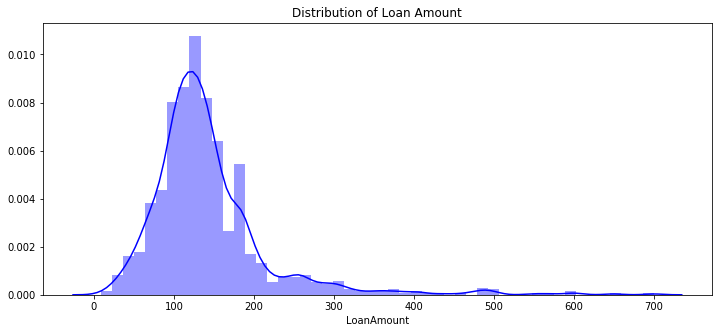

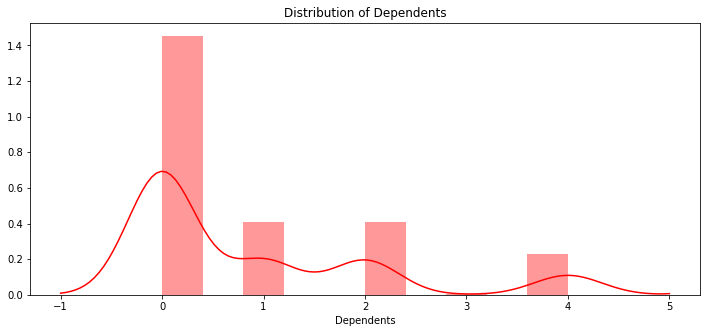

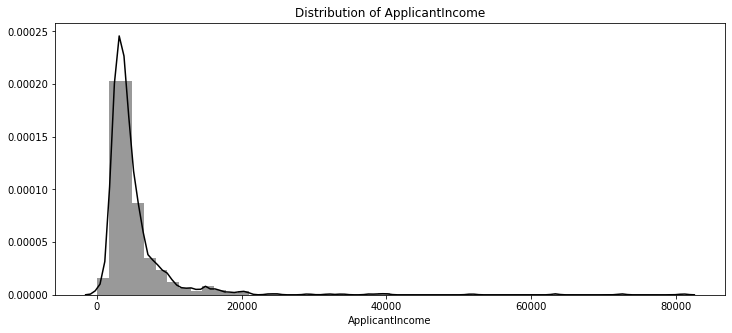

In [21]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Loan Amount')
sns.distplot(cr['LoanAmount'], color='b')

plt.figure(figsize=(12,5))
plt.title('Distribution of Dependents')
sns.distplot(cr['Dependents'], color='r')

plt.figure(figsize=(12,5))
plt.title('Distribution of ApplicantIncome')
sns.distplot(cr['ApplicantIncome'], color='k')

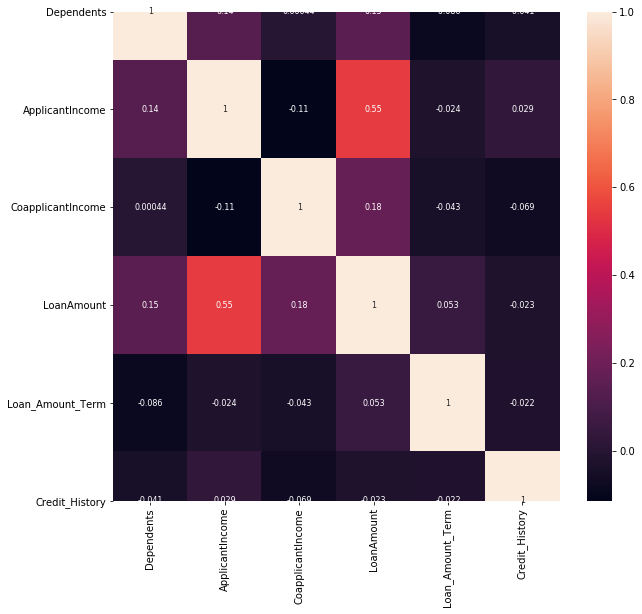

In [22]:
# Correlation plot
cr_num = cr.select_dtypes(include=['int64','float64' ])
correlation = cr_num.corr()

plt.figure(figsize=(10,9))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

In [23]:
cr_num.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.136293,0.000443,0.150500,-0.086199,-0.040587
ApplicantIncome,0.136293,1.000000,-0.114247,0.547188,-0.023823,0.029453
CoapplicantIncome,0.000443,-0.114247,1.000000,0.178449,-0.042750,-0.068562
LoanAmount,0.150500,0.547188,0.178449,1.000000,0.053187,-0.023185
Loan_Amount_Term,-0.086199,-0.023823,-0.042750,0.053187,1.000000,-0.021745
Credit_History,-0.040587,0.029453,-0.068562,-0.023185,-0.021745,1.000000


In [24]:
cr.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Variable Transformation

Convert categorical variables by replace function so that they can be used by the models.

In [25]:

cr.Gender.replace({'Male':1, 'Female':0}, inplace=True)

In [26]:
cr.Married.replace({'No':0, 'Yes':1}, inplace=True)

In [27]:
cr.Self_Employed.replace({'No':0, 'Yes':1}, inplace=True)

In [28]:
cr.Property_Area.replace({'Semiurban':1,'Urban':2,'Rural':3},inplace=True)

In [29]:
cr.Loan_Status.replace({'Y':1,'N':0},inplace=True)

In [30]:
cr.Education.replace({'Graduate':1,'Not Graduate':0},inplace=True)            

In [31]:
cr.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1
5,LP001011,1,1,2.0,1,1,5417,4196.0,267.00000,360.0,1.0,2,1
6,LP001013,1,1,0.0,0,0,2333,1516.0,95.00000,360.0,1.0,2,1
7,LP001014,1,1,4.0,1,0,3036,2504.0,158.00000,360.0,0.0,1,0
8,LP001018,1,1,2.0,1,0,4006,1526.0,168.00000,360.0,1.0,2,1
9,LP001020,1,1,1.0,1,0,12841,10968.0,349.00000,360.0,1.0,1,0


In [32]:
cr.shape

(981, 13)

Divide the target variable and independent variable into two sepearete object named as cr_x(contains all Independent Varibale) and cr_y(has only Target Variable)

In [33]:
cr_x = cr.iloc[:,1:12] 

In [34]:
cr_x.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2
1,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3
2,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2
3,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2
4,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2


In [35]:
cr_y = cr.iloc[:,-1]

In [36]:
cr_y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Sampling

Divide the data into model training dataset and test dataset.


In [37]:
import sklearn
from sklearn.model_selection import train_test_split

In [38]:
cr_x_train,cr_x_test,cr_y_train,cr_y_test=train_test_split(cr_x,cr_y, test_size=0.2, random_state=101)

In [39]:
print(cr_x_train.shape)

print(cr_y_train.shape)

(784, 11)
(784,)


In [40]:
print(cr_x_test.shape)

print(cr_y_test.shape)

(197, 11)
(197,)


# Model Building, testing and validation

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log = LogisticRegression()

In [43]:
log.fit(cr_x_train,cr_y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#Prediction for model
pred = log.predict(cr_x_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [45]:
confusionmatrix_log = pd.crosstab(pred, cr_y_test, rownames=['predicted'], colnames= ['Actual'], margins=False)
confusionmatrix_log

Actual,0,1
predicted,,
0,28,16
1,29,124


In [46]:
print('Accuracy:',metrics.accuracy_score(pred,cr_y_test)*100)

Accuracy: 77.15736040609137


In [47]:
print(classification_report(pred,cr_y_test))

              precision    recall  f1-score   support

           0       0.49      0.64      0.55        44
           1       0.89      0.81      0.85       153

    accuracy                           0.77       197
   macro avg       0.69      0.72      0.70       197
weighted avg       0.80      0.77      0.78       197



In [48]:
y_score = log.predict_proba(cr_x_test)[:,1]

In [49]:
tmp_log = pd.Series({'model': 'LogisticRegression',
                     'roc_auc_score' : metrics.roc_auc_score(cr_y_test, y_score),
                         'precision_score': metrics.precision_score(cr_y_test, pred),
                         'recall_score': metrics.recall_score(cr_y_test, pred),
                     'f1_score': metrics.f1_score(cr_y_test, pred),'model_type':'Non-balanced'})

In [50]:
models_report_log = pd.DataFrame(columns = ['model', 'roc_auc_score', 'precision_score', 'recall_score','f1_score','model_type'])

In [51]:
models_report_log = models_report_log.append(tmp_log, ignore_index = True)
models_report_log

,model,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,LogisticRegression,0.772306,0.810458,0.885714,0.846416,Non-balanced


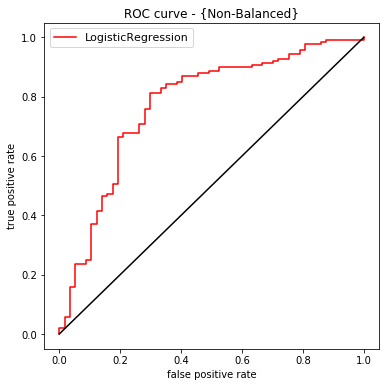

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(cr_y_test, y_score, drop_intermediate = False, pos_label = 1)

plt.figure(figsize=(6,6))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve - {Non-Balanced}')
plt.plot(fpr, tpr, label = 'LogisticRegression',color='r')
plt.legend(loc=2, prop={'size':11})
plt.plot([0,1],[0,1], color = 'black')

# Campaign for entire data

In [53]:
cr_full = cr.iloc[:,1:12]


In [54]:
log.predict(cr_full)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [55]:
prob_on_full_data = log.predict_proba(cr_full)

In [56]:
prob_on_full_data

array([[0.16651702, 0.83348298],
       [0.18945325, 0.81054675],
       [0.10564596, 0.89435404],
       ...,
       [0.53087997, 0.46912003],
       [0.17771067, 0.82228933],
       [0.22325254, 0.77674746]])

In [57]:
prob_on_full_data = pd.DataFrame(prob_on_full_data)

In [58]:
prob_on_full_data.rename(columns={prob_on_full_data.columns[0]:'Prob_Zero',prob_on_full_data.columns[1]:'Prob_One'},inplace=True)

In [59]:
prob_on_full_data.head(5)

,Prob_Zero,Prob_One
0,0.166517,0.833483
1,0.189453,0.810547
2,0.105646,0.894354
3,0.138689,0.861311
4,0.165540,0.834460


In [60]:
prob_on_full_data = pd.concat([prob_on_full_data,pd.Series(cr.Loan_ID)],axis=1)

In [61]:
prob_on_full_data.shape

(981, 3)

In [62]:
prob_on_full_data.head(20)

,Prob_Zero,Prob_One,Loan_ID
0,0.166517,0.833483,LP001002
1,0.189453,0.810547,LP001003
2,0.105646,0.894354,LP001005
3,0.138689,0.861311,LP001006
4,0.165540,0.834460,LP001008
5,0.157736,0.842264,LP001011
6,0.136274,0.863726,LP001013
7,0.528294,0.471706,LP001014
8,0.136392,0.863608,LP001018
9,0.063169,0.936831,LP001020


In [63]:
prob_on_full_data.sort_values(['Prob_One'],ascending=False)

,Prob_Zero,Prob_One,Loan_ID
185,0.025537,0.974463,LP001640
513,0.040459,0.959541,LP002648
590,0.043251,0.956749,LP002928
467,0.045968,0.954032,LP002501
424,0.046413,0.953587,LP002364
...,...,...,...
953,0.848484,0.151516,LP002858
130,0.855906,0.144094,LP001469
761,0.865052,0.134948,LP001817
338,0.878604,0.121396,LP002113
